In [16]:
import pandas as pd, numpy as np
import datetime
import random
from matplotlib import pyplot as plt
n_transactions = 200000

In [17]:
customer_cols = ['Customer Code', 'Customer Name', 'Customer Parent Code', 'Customer Parent Name', 'Contract ID']
cust_master = pd.DataFrame()

customer_codes = ["C"+"{0:05}".format(i) for i in range(1,151,1)]
customer_names = ["Customer "+"{0:03}".format(i) for i in range(1,151,1)]
customer_family_codes = ["CF"+"{0:04}".format(i) for i in range(1,7,1)]
customer_family_names = ["Customer Family "+"{0:03}".format(i) for i in range(1,7,1)]

cust_master[customer_cols[0]] = customer_codes
cust_master[customer_cols[1]] = customer_names


cust_master[customer_cols[2]] = random.choices(customer_family_codes,k=150)
cust_master[customer_cols[3]] = cust_master[customer_cols[2]].apply(lambda x: 'Customer Family '+ x[3:])

cust_master.head(2)

Customer Code Customer Name Customer Parent Code Customer Parent Name
0        C00001  Customer 001               CF0006  Customer Family 006
1        C00002  Customer 002               CF0006  Customer Family 006

In [18]:
prod_master_cols = ['Product Code', 'Product Name', 'Product Family Code', 'Product Family Name', 'Product Type', 'Product Segment', 'Manufacturing Site', 'Unit of Measure', 'Product Status', 'List Price', 'Contract ID']
prod_master = pd.DataFrame()

product_codes = ["P"+"{0:03}".format(i) for i in range(1,51,1)]
product_names = ["Product "+"{0:02}".format(i) for i in range(1,51,1)]
product_family_codes = ["PF"+"{0:03}".format(i) for i in range(1,18,1)]
product_family_names = ["Product Family "+"{0:03}".format(i) for i in range(1,18,1)]
product_types = ["Type"+"{0:03}".format(i) for i in range(1,9,1)]
product_segments = ["Prod.Seg. "+"{0:03}".format(i) for i in range(1,18,1)]
manufacturing_sites = ['New York', 'Chicago', 'Los Angeles', 'San Francisco', 'Washington DC', 'Houston']
unit_of_measure = ['KG']
product_status = ['Development', 'Active', 'Discontinued']

prod_master['Product Code'] = product_codes
prod_master['Product Name'] = product_names

listprice = np.round(np.random.exponential(100,len(product_codes)),0)

fvars = [product_family_codes, product_family_names, product_types, product_segments, manufacturing_sites, unit_of_measure, product_status]

for i in range(7):
    prod_master[prod_master_cols[i+2]] = random.choices(fvars[i],k=50)

prod_master['Product Family Name'] = prod_master['Product Family Code'].apply(lambda x: 'Product Family '+ x[3:])
prod_master.replace('Discontinued','Active',inplace=True)
prod_master.loc[45,'Product Status'] = 'Discontinued'
prod_master['List Price'] = listprice

prod_master.head(2)

Product Code Product Name Product Family Code Product Family Name  \
0         P001   Product 01               PF006   Product Family 06   
1         P002   Product 02               PF015   Product Family 15   

  Product Type Product Segment Manufacturing Site Unit of Measure  \
0      Type001   Prod.Seg. 017            Chicago              KG   
1      Type008   Prod.Seg. 003           New York              KG   

  Product Status  List Price  
0         Active       187.0  
1         Active        62.0

In [19]:
sales_rep_names = ['George Washington', 'John Adams', 'Thomas Jefferson', 'James Madison', 'James Monroe', 'John Quincy Adams', 'Andrew Jackson', 'Martin Van Buren', 'William H. Harrison', 'John Tyler', 'James K. Polk',
              'Zachary Taylor', 'Millard Fillmore', 'Franklin Pierce', 'James Buchanan', 'Abraham Lincoln', 'Andrew Johnson', 'Ulysses S. Grant', 'Rutherford B. Hayes', 'James A. Garfield', 'Chester A. Arthur',
              'Grover Cleveland', 'Benjamin Harrison', 'Grover Cleveland', 'William McKinley', 'Theodore Roosevelt', 'William H. Taft', 'Woodrow Wilson', 'Warren G. Harding', 'Calvin Coolidge', 'Herbert Hoover',
              'Franklin D. Roosevelt', 'Harry Truman', 'Dwight D. Eisenhower', 'John F. Kennedy', 'Lyndon B. Johnson', 'Richard M. Nixon', 'Gerald R. Ford', 'James E. Carter', 'Ronald Reagan', 'George Bush',
              'Bill Clinton', 'George Bush', 'Barack Obama']
sales_rep_ids = ['SR'+'{0:03}'.format(i+1) for i in range(len(sales_rep_names))]
sales_reps = pd.DataFrame(list(zip(sales_rep_ids,sales_rep_names)), columns = ['Sales Rep ID', 'Sales Rep Name'])
sales_reps.head(2)

Sales Rep ID     Sales Rep Name
0        SR001  George Washington
1        SR002         John Adams

In [20]:
cost_data_cols = ['Product Code', 'Year', 'Standard Cost (USD)', 'Conversion Cost (USD)','Standard Cost (Local Currency)', 'Conversion Cost (Local Currency)']
years = [2016,2017,2018]
#pd.merge(pd.DataFrame(list(zip([1]*100,product_codes)),columns=[0,'Product Code']),pd.DataFrame(list(zip([1]*3,years)),columns =[0,'Year']), how='outer', left_on=0, right_on=0)[cost_data_cols[:2]]
multi_cols = pd.MultiIndex.from_product([cost_data_cols[2:],years], names=['','Year'])
cost_data = pd.DataFrame(columns = multi_cols)
cost_data['Product Code'] = product_codes
basecost =  np.round(prod_master['List Price']*(np.random.rand(len(product_codes))*.5+.5))
cost_data[cost_data_cols[2],years[0]] = basecost
cost_data[cost_data_cols[2],years[1]] = np.round(cost_data[cost_data_cols[2],years[0]]*(1+np.random.rand(50)*.041))
cost_data[cost_data_cols[2],years[2]] = np.round(cost_data[cost_data_cols[2],years[1]]*(1+np.random.rand(50)*.041))

cost_data[cost_data_cols[3],years[0]] = np.round(basecost*(np.random.rand(50)*.35+.1))
cost_data[cost_data_cols[3],years[1]] = np.round(cost_data[cost_data_cols[3],years[0]]*(1+np.random.rand(50)*.041))
cost_data[cost_data_cols[3],years[2]] = np.round(cost_data[cost_data_cols[3],years[1]]*(1+np.random.rand(50)*.041))

cost_data[cost_data_cols[4]]=cost_data[cost_data_cols[2]]
cost_data[cost_data_cols[5]]=cost_data[cost_data_cols[3]]

cost_data = cost_data.set_index(cost_data_cols[0]).stack().reset_index()
cost_data['Year']= cost_data['Year'].astype(int)
cost_data.head(2)

Product Code  Year  Conversion Cost (Local Currency)  Conversion Cost (USD)  \
0         P001  2016                              15.0                   15.0   
1         P001  2017                              15.0                   15.0   

   Standard Cost (Local Currency)  Standard Cost (USD)  
0                           102.0                102.0  
1                           103.0                103.0

In [21]:
inv_cols = ["Invoice Number", "Business Unit", "Department Code", "Customer Code", "Invoice Date", "Product Code", "Sales Rep ID", 
            "Ship To", "Not a Product?", "Invoice Amount (Local Currency)", "Invoice Amount (USD)", "Quantity"]

bu_list = ["BU-"+str(i) for i in range(1,4,1)]
dept_codes = ["Dept-"+"{0:03}".format(i) for i in range(1,15,1)]
# site_list = ["Tokyo", "New York", "Los Angeles", "London", "Chicago", "Paris", "Mexico City", "Philadelphia", "Buenos Aires", "Hong Kong", "Berlin", "Bangkok", "Singapore", "Delhi"]
time_period = [datetime.date(2016,1,1)+datetime.timedelta(days=i) for i in range(365*3+1)]
ship_to = ["USA", "Germany", "Italy", "Japan", "France", "China", "India", "UK", "Thailand", "Singapore"]
invoice_numbers = ["I"+"{0:05}".format(i) for i in range(1,n_transactions+1,1)]

fvars = [bu_list, dept_codes, customer_codes, time_period, product_codes, sales_rep_ids, ship_to]

transaction_data = pd.DataFrame()
transaction_data['Invoice Number'] = invoice_numbers
for i in range(7):
    transaction_data[inv_cols[i+1]] = random.choices(fvars[i],k=n_transactions)
transaction_data['Not a Product?']= False
transaction_data['Quantity'] = np.round(np.random.f(200,100,n_transactions)*np.random.rand(n_transactions)*500,0)

transaction_data['List Price'] = pd.merge(transaction_data[['Invoice Number', 'Product Code']], prod_master[['Product Code','List Price']], how='left')['List Price']
transaction_data['Invoice Amount (USD)'] = np.round(pd.merge(transaction_data[['Invoice Number', 'Product Code']], prod_master[['Product Code','List Price']], how='left')['List Price']*(np.random.rand()*.25+.75)*transaction_data['Quantity'])
transaction_data["Invoice Amount (Local Currency)"] = transaction_data['Invoice Amount (USD)']

transaction_data = transaction_data[inv_cols]
transaction_data.head(2)

Invoice Number Business Unit Department Code Customer Code Invoice Date  \
0         I00001          BU-1        Dept-009        C00149   2016-01-20   
1         I00002          BU-2        Dept-004        C00067   2016-11-01   

  Product Code Sales Rep ID Ship To  Not a Product?  \
0         P010        SR030   Japan           False   
1         P005        SR002   India           False   

   Invoice Amount (Local Currency)  Invoice Amount (USD)  Quantity  
0                          78489.0               78489.0     321.0  
1                           1747.0                1747.0     353.0

In [22]:
from functools import reduce
def mergefun(left,right):
    return pd.merge(left,right,how='left',validate = 'many_to_one')
transaction_data['Year'] = transaction_data['Invoice Date'].map(lambda x: x.year)
tables = [transaction_data,sales_reps,prod_master,cust_master,cost_data]
cube = reduce(mergefun,tables)
cube.drop('Year',axis=1,inplace=True)
print(cube.columns, cube.shape)
cube.head()

Index(['Invoice Number', 'Business Unit', 'Department Code', 'Customer Code',
       'Invoice Date', 'Product Code', 'Sales Rep ID', 'Ship To',
       'Not a Product?', 'Invoice Amount (Local Currency)',
       'Invoice Amount (USD)', 'Quantity', 'Sales Rep Name', 'Product Name',
       'Product Family Code', 'Product Family Name', 'Product Type',
       'Product Segment', 'Manufacturing Site', 'Unit of Measure',
       'Product Status', 'List Price', 'Customer Name', 'Customer Parent Code',
       'Customer Parent Name', 'Conversion Cost (Local Currency)',
       'Conversion Cost (USD)', 'Standard Cost (Local Currency)',
       'Standard Cost (USD)'],
      dtype='object') (200000, 29)


Invoice Number Business Unit Department Code Customer Code Invoice Date  \
0         I00001          BU-1        Dept-009        C00149   2016-01-20   
1         I00002          BU-2        Dept-004        C00067   2016-11-01   
2         I00003          BU-3        Dept-003        C00003   2018-05-17   
3         I00004          BU-3        Dept-013        C00026   2017-10-19   
4         I00005          BU-1        Dept-011        C00111   2016-04-30   

  Product Code Sales Rep ID Ship To  Not a Product?  \
0         P010        SR030   Japan           False   
1         P005        SR002   India           False   
2         P015        SR040   India           False   
3         P011        SR006     USA           False   
4         P024        SR044   India           False   

   Invoice Amount (Local Currency)         ...          Unit of Measure  \
0                          78489.0         ...                       KG   
1                           1747.0         ...                       KG   
2                          17783.0         ...                       KG   
3                          12869.0         ...                       KG   
4                          61475.0         ...                       KG   

   Product Status List Price Customer Name Customer Parent Code  \
0          Active      247.0  Customer 149               CF0004   
1     Development        5.0  Customer 067               CF0006   
2          Active       36.0  Customer 003               CF0004   
3     Development      104.0  Customer 026               CF0006   
4          Active      108.0  Customer 111               CF0002   

  Customer Parent Name Conversion Cost (Local Currency) Conversion Cost (USD)  \
0  Customer Family 004                             75.0                  75.0   
1  Customer Family 006                              1.0                   1.0   
2  Customer Family 004                              6.0                   6.0   
3  Customer Family 006                             43.0                  43.0   
4  Customer Family 002                              9.0                   9.0   

  Standard Cost (Local Currency) Standard Cost (USD)  
0                          205.0               205.0  
1                            5.0                 5.0  
2                           36.0                36.0  
3                           96.0                96.0  
4                           73.0                73.0  

[5 rows x 29 columns]

In [23]:
cube['Margin (USD)'] =  cube['Invoice Amount (USD)'] - cube['Quantity']*cube['Standard Cost (USD)']
cube['Margin (%)'] =  cube['Margin (USD)']/cube['Invoice Amount (USD)']
cube['Conversion %'] = cube['Conversion Cost (USD)']/cube['Standard Cost (USD)']
relc = ['Invoice Amount (USD)', 'Quantity', 'Conversion Cost (USD)', 'Standard Cost (USD)', 'Margin (USD)','Margin (%)']
def plf(column_name):
    plt.hist(cube[cube[column_name].notna()][column_name],50)

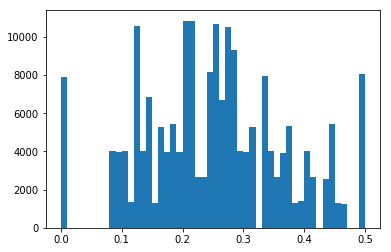

In [24]:
plf('Conversion %')

In [25]:
cp = cube.groupby('Product Code').sum()

In [26]:
cp['Margin (%)'] = cp['Margin (USD)']/cp['Invoice Amount (USD)']

In [27]:
cube['Year'] = cube['Invoice Date'].map(lambda x: x.year)

In [28]:
cy = cube.groupby('Year').sum()

In [29]:
cy['Margin (USD)']/cy['Invoice Amount (USD)']

Year
2016    0.191097
2017    0.175798
2018    0.162041
dtype: float64

In [31]:
cube.to_excel('Data_Cube.xlsx')